In [82]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import graphviz
import datetime
#matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error

# 1.读取数据

In [83]:
import seaborn as sns
sns.set(color_codes= True)
np.random.seed(sum(map(ord,'distributions')))

In [84]:
def change_date(s):
    s = datetime.datetime.strptime(s, "%Y-%m")  # 把日期标准化，转化结果如：2015/1/4 => 2015-01-04 00:00:00
    s = str(s)  # 上一步把date转化为了时间格式，因此要把date转回str格式
    return s[:7] # 只获取年月日，即“位置10”之前的字符串

In [85]:
#导入数据
df1 = pd.read_excel(r"C:\Users\96212\Desktop\dataset\basedata\fj3.xls")
df1['日期'] = df1['年份'].map(str)+"-"+df1['月份'].map(str)
df1['日期'] = df1['日期'].map(change_date)
df1 = df1.sort_values(by='日期') 
df1.head()

,月份,年份,经度(lon),纬度(lat),10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2),日期
111,1,2012,115.375,44.125,13.73,30.87,42.79,168.56,2012-01
112,2,2012,115.375,44.125,13.00,30.87,42.79,168.56,2012-02
113,3,2012,115.375,44.125,12.60,30.87,42.79,168.56,2012-03
114,4,2012,115.375,44.125,11.97,30.73,42.76,168.56,2012-04
115,5,2012,115.375,44.125,14.18,29.99,42.58,168.56,2012-05


In [86]:
df = df1.drop(['月份', '年份','经度(lon)', '纬度(lat)'], axis = 1)
df.head(5)

,10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2),日期
111,13.73,30.87,42.79,168.56,2012-01
112,13.00,30.87,42.79,168.56,2012-02
113,12.60,30.87,42.79,168.56,2012-03
114,11.97,30.73,42.76,168.56,2012-04
115,14.18,29.99,42.58,168.56,2012-05


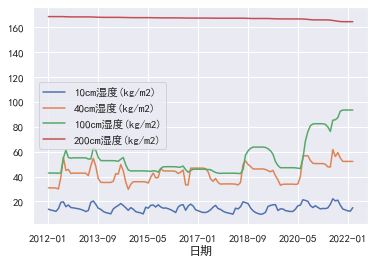

In [87]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文
df.plot(x='日期')

In [88]:
df2 = pd.read_csv("data/15.csv")
df2.head(5)

,年份,轮次,处理,日期,植物种名,植物群落功能群,放牧小区Block,重复,营养苗,生殖苗,株/丛数,丛幅1,丛幅2,鲜重(g),干重(g)
0,2019,牧前,轻牧（3天）,2019.5.10,大针茅,PB,G6,1,24.0,NaN,15.0,11.0,11.0,59.43,25.41
1,2019,牧前,轻牧（3天）,2019.5.10,羊草,PR,G6,1,12.0,NaN,17.0,NaN,NaN,1.70,0.64
2,2019,牧前,轻牧（3天）,2019.5.10,苔草,PR,G6,1,11.0,NaN,13.0,NaN,NaN,1.27,0.99
3,2019,牧前,轻牧（3天）,2019.5.10,糙隐子草,PB,G6,1,4.0,NaN,16.0,4.0,4.0,2.60,1.25
4,2019,牧前,轻牧（3天）,2019.5.10,知母,PF,G6,1,4.0,NaN,9.0,NaN,NaN,0.62,0.30


In [89]:
x = df1.loc[(df1['年份'] == 2019 )& (df1['月份']== 5 ), ['年份','月份','10cm湿度(kg/m2)', '40cm湿度(kg/m2)','100cm湿度(kg/m2)','200cm湿度(kg/m2)']]
x.head(5)

,年份,月份,10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2)
31,2019,5,15.88,44.71,62.31,167.02


In [90]:
df2.describe()

,年份,营养苗,生殖苗,株/丛数,丛幅1,丛幅2,鲜重(g),干重(g)
count,10881.000000,10716.000000,1288.000000,10631.000000,3932.000000,3677.000000,10646.000000,10881.000000
mean,2018.112122,18.533315,52.527562,23.329282,6.010453,5.755344,30.022981,15.972425
std,1.390594,14.246654,30.211361,45.769922,5.318852,5.074143,58.716677,32.761917
min,2016.000000,1.000000,1.000000,0.000000,0.200000,0.200000,0.010000,0.010000
25%,2017.000000,7.000000,34.000000,3.000000,2.000000,3.000000,0.650000,0.230000
50%,2018.000000,14.000000,53.000000,8.000000,5.000000,5.000000,3.575000,1.490000
75%,2019.000000,27.000000,70.000000,21.000000,8.000000,8.000000,27.300000,13.390000
max,2020.000000,81.000000,714.000000,640.000000,60.000000,110.000000,785.250000,483.530000


In [91]:
# df2.style

In [92]:
pd.DataFrame(df2,['放牧小区Block','鲜重(g)'])

,年份,轮次,处理,日期,植物种名,植物群落功能群,放牧小区Block,重复,营养苗,生殖苗,株/丛数,丛幅1,丛幅2,鲜重(g),干重(g)
放牧小区Block,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
鲜重(g),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
df3 = df2.loc[:,['日期','放牧小区Block','鲜重(g)','干重(g)']]

In [94]:
df3['rate'] = (df3['鲜重(g)'] - df3['干重(g)'])/df3['干重(g)']

In [95]:
df3

,日期,放牧小区Block,鲜重(g),干重(g),rate
0,2019.5.10,G6,59.43,25.41,1.338843
1,2019.5.10,G6,1.70,0.64,1.656250
2,2019.5.10,G6,1.27,0.99,0.282828
3,2019.5.10,G6,2.60,1.25,1.080000
4,2019.5.10,G6,0.62,0.30,1.066667
...,...,...,...,...,...
10876,2016.9.21,G21,100.97,62.43,0.617331
10877,2016.9.21,G21,155.52,90.01,0.727808
10878,2016.9.21,G21,45.55,29.93,0.521884
10879,2016.9.21,G21,47.21,18.87,1.501855


In [96]:
df3.describe()

,鲜重(g),干重(g),rate
count,10646.000000,10881.000000,10646.000000
mean,30.022981,15.972425,2.446715
std,58.716677,32.761917,3.681090
min,0.010000,0.010000,-0.943049
25%,0.650000,0.230000,0.801291
50%,3.575000,1.490000,1.158424
75%,27.300000,13.390000,2.526517
max,785.250000,483.530000,199.819672


In [97]:
# df3['日期'] = pd.to_datetime(df3['日期']) #将数据类型转换为日期类型

In [98]:
# 对缺失值进行填充
df3.fillna(-1, inplace=True)
df3.isnull().sum()

日期           0
放牧小区Block    0
鲜重(g)        0
干重(g)        0
rate         0
dtype: int64

# 2.日期划分

In [99]:
def DateSplit(df, col):
    """
    split the object of '2010-01-02' into year(2010), month(1) and day(2).
    :param df:  to operate data （type：DataFrame）
    :param col: column label of date object （type：str）
    :return: converted date （type： DataFrame）
    """
    year, month, day,ym = [], [], [],[]
    data = df.loc[:, col].values
    df = df.drop([col], axis=1)
    
    for i in range(data.shape[0]):
        year.append(int(data[i][:4]))
        month.append(int(data[i][5]))
        ym.append(str(data[i][:6]))
        day.append(int(data[i][7:8]))
    date = pd.DataFrame({'ym':ym})
    result = pd.concat([date, df], axis=1)
    return result

data = DateSplit(df=df3,col='日期')
data.head(10)

,ym,放牧小区Block,鲜重(g),干重(g),rate
0,2019.5,G6,59.43,25.41,1.338843
1,2019.5,G6,1.70,0.64,1.656250
2,2019.5,G6,1.27,0.99,0.282828
3,2019.5,G6,2.60,1.25,1.080000
4,2019.5,G6,0.62,0.30,1.066667
5,2019.5,G6,1.07,0.22,3.863636
6,2019.5,G6,12.49,6.13,1.037520
7,2019.5,G6,5.33,1.97,1.705584
8,2019.5,G6,0.36,0.12,2.000000
9,2019.5,G6,7.55,4.87,0.550308


In [100]:
data

,ym,放牧小区Block,鲜重(g),干重(g),rate
0,2019.5,G6,59.43,25.41,1.338843
1,2019.5,G6,1.70,0.64,1.656250
2,2019.5,G6,1.27,0.99,0.282828
3,2019.5,G6,2.60,1.25,1.080000
4,2019.5,G6,0.62,0.30,1.066667
...,...,...,...,...,...
10876,2016.9,G21,100.97,62.43,0.617331
10877,2016.9,G21,155.52,90.01,0.727808
10878,2016.9,G21,45.55,29.93,0.521884
10879,2016.9,G21,47.21,18.87,1.501855


In [101]:
data.describe()

,鲜重(g),干重(g),rate
count,10881.000000,10881.000000,10881.000000
mean,29.352969,15.972425,2.372276
std,58.253929,32.761917,3.675432
min,-1.000000,0.010000,-1.000000
25%,0.570000,0.230000,0.779817
50%,3.350000,1.490000,1.136364
75%,25.950000,13.390000,2.482759
max,785.250000,483.530000,199.819672


# 3.分组求和

In [102]:
data4 = data.groupby(['ym','放牧小区Block']).sum()
data4

鲜重(g)    干重(g)        rate
ym     放牧小区Block                              
2016.6 G11        1590.85   764.51  172.350824
       G12        2405.71  1186.79  114.360890
       G13        1743.71   850.94  191.741003
       G16        1442.84   793.14  129.863230
       G17        1817.61   797.09  134.729040
...                   ...      ...         ...
2020.9 G20        1315.70   787.06   77.554268
       G21        1767.52   862.94   46.005792
       G6         2569.76  1597.61  101.971242
       G8         2201.15  1262.96   88.847145
       G9         1272.25   740.23  105.963182

[287 rows x 3 columns]

In [103]:
data5 = data.groupby(['ym']).mean()
data5['序号'] = range(1, len(data5)+1)
data5

,鲜重(g),干重(g),rate,序号
ym,,,,
2016.6,29.920200,14.456838,2.400344,1
2016.7,39.337843,20.575152,2.616630,2
2016.8,40.416066,24.890480,1.851651,3
2016.9,37.245314,21.838486,2.148148,4
2017.5,19.765203,8.578649,3.024912,5
2017.6,26.007136,14.805778,1.813444,6
2017.7,30.691083,16.282092,2.942203,7
2017.8,41.923243,22.153496,2.236252,8
2017.9,31.091419,20.645118,2.139225,9


In [104]:
#归一化
# def minmax_norm(df_input):
#     return (df_input - df_input.min()) / ( df_input.max() - df_input.min())
# data5 = minmax_norm(data5)
# data5
data5['干重(g)']  = (data5['干重(g)'] - data5['干重(g)'].min()) / ( data5['干重(g)'].max() - data5['干重(g)'].min())
data5['rate']  = (data5['rate'] - data5['rate'].min()) / ( data5['rate'].max() - data5['rate'].min())

In [105]:
data5

,鲜重(g),干重(g),rate,序号
ym,,,,
2016.6,29.920200,0.530291,0.528045,1
2016.7,39.337843,0.805730,0.645399,2
2016.8,40.416066,1.000000,0.230332,3
2016.9,37.245314,0.862603,0.391207,4
2017.5,19.765203,0.265663,0.866927,5
2017.6,26.007136,0.546000,0.209602,6
2017.7,30.691083,0.612462,0.822050,7
2017.8,41.923243,0.876785,0.439011,8
2017.9,31.091419,0.808879,0.386366,9


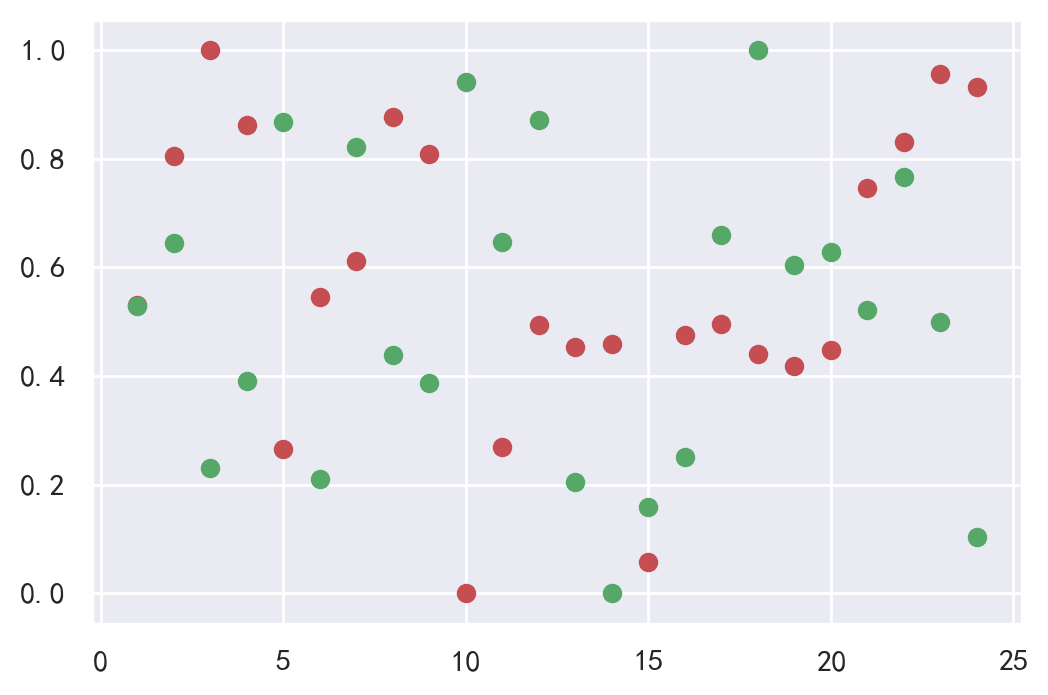

In [106]:
plt.figure(figsize = (6,4),dpi=200)
plt.scatter(data5['序号'], data5['干重(g)'], color = 'r', label = "x")
plt.scatter(data5['序号'], data5['rate'], color = 'g', label = "x")

In [107]:
coef = np.polyfit(data5['序号'], data5['干重(g)'], 6) #求出系数
print('拟合函数的系数 :\n', coef ) #打印出系数

拟合函数的系数 :
 [-7.69937236e-07  5.86900547e-05 -1.73798560e-03  2.54180647e-02
 -1.88513559e-01  6.01340283e-01  1.49810464e-01]


In [108]:
funExpression = np.poly1d(coef) #求出表达式
print('拟合表达式 :\n',funExpression)  #打印出表达式

拟合表达式 :
             6             5            4           3          2
-7.699e-07 x + 5.869e-05 x - 0.001738 x + 0.02542 x - 0.1885 x + 0.6013 x + 0.1498


In [109]:
yFit =np.polyval(funExpression,data5['序号']) #求出拟合函数的y值
print("拟合出来的y值：\n", yFit)

拟合出来的y值：
 [0.58637519 0.77580235 0.81642059 0.77773143 0.70606614 0.62968834
 0.56334221 0.51224633 0.47553319 0.44913431 0.42811109 0.40843118
 0.3881906  0.36828145 0.3525053  0.34713218 0.35990525 0.39849114
 0.46837585 0.57020639 0.69657798 0.82826698 0.92990941 0.94512512]


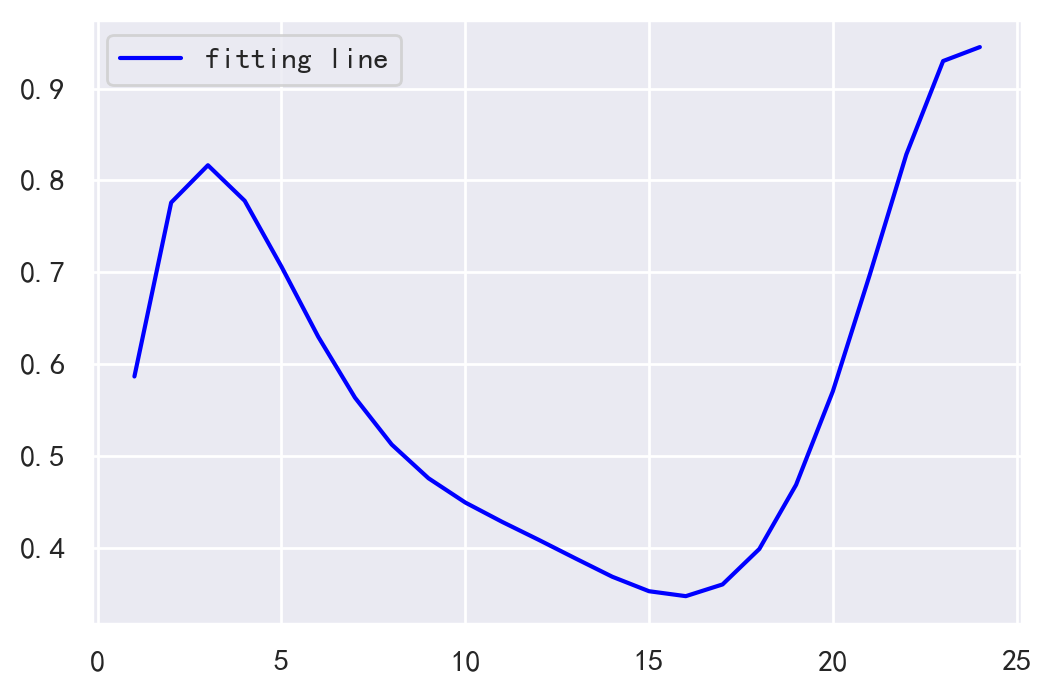

In [110]:
plt.figure(figsize = (6,4),dpi=200)
plt.plot(data5['序号'], yFit, color = 'blue', label ="fitting line")
plt.legend(loc = "upper left")
plt.show()

In [111]:
data = pd.DataFrame()

data=data4.reset_index() ###记住reset
#print(data)
# data.to_csv("data/process3.csv", index=False, encoding="utf_8_sig")

In [112]:
data

,ym,放牧小区Block,鲜重(g),干重(g),rate
0,2016.6,G11,1590.85,764.51,172.350824
1,2016.6,G12,2405.71,1186.79,114.360890
2,2016.6,G13,1743.71,850.94,191.741003
3,2016.6,G16,1442.84,793.14,129.863230
4,2016.6,G17,1817.61,797.09,134.729040
...,...,...,...,...,...
282,2020.9,G20,1315.70,787.06,77.554268
283,2020.9,G21,1767.52,862.94,46.005792
284,2020.9,G6,2569.76,1597.61,101.971242
285,2020.9,G8,2201.15,1262.96,88.847145


In [113]:
data5 = pd.read_csv("data/process3.csv")
data5.head(5)

,ym,放牧小区Block,鲜重(g),干重(g),rate
0,2016.6,G11,1590.85,764.51,172.350824
1,2016.6,G12,2405.71,1186.79,114.360890
2,2016.6,G13,1743.71,850.94,191.741003
3,2016.6,G16,1442.84,793.14,129.863230
4,2016.6,G17,1817.61,797.09,134.729040


In [114]:
data5

,ym,放牧小区Block,鲜重(g),干重(g),rate
0,2016.6,G11,1590.85,764.51,172.350824
1,2016.6,G12,2405.71,1186.79,114.360890
2,2016.6,G13,1743.71,850.94,191.741003
3,2016.6,G16,1442.84,793.14,129.863230
4,2016.6,G17,1817.61,797.09,134.729040
...,...,...,...,...,...
282,2020.9,G20,1315.70,787.06,77.554268
283,2020.9,G21,1767.52,862.94,46.005792
284,2020.9,G6,2569.76,1597.61,101.971242
285,2020.9,G8,2201.15,1262.96,88.847145


In [115]:
area = data5['放牧小区Block'].unique()
area

array(['G11', 'G12', 'G13', 'G16', 'G17', 'G18', 'G19', 'G20', 'G21',
       'G6', 'G8', 'G9'], dtype=object)

In [116]:
# area1 = ['G17', 'G19', 'G21']
# area2 = ['G6', 'G12', 'G18']
# area3 = ['G8', 'G11', 'G16']
# area4 = ['G9', 'G13', 'G20']
area = {
    'NG':['G17', 'G19', 'G21'],
    'LGl':['G6', 'G12', 'G18'],
    'MGl':['G8', 'G11', 'G16'],
    'HGl':['G9', 'G13', 'G20'],
}

In [117]:
# data5.style

# 4.颜色画图

In [118]:
import random
def randomcolor():
    colorArr = ['1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
    color = ""
    for i in range(6):
        color += colorArr[random.randint(0,14)]
    return "#"+color

# 5. rate画图

d:\Users\96212\anaconda3\envs\ML\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\Users\96212\anaconda3\envs\ML\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


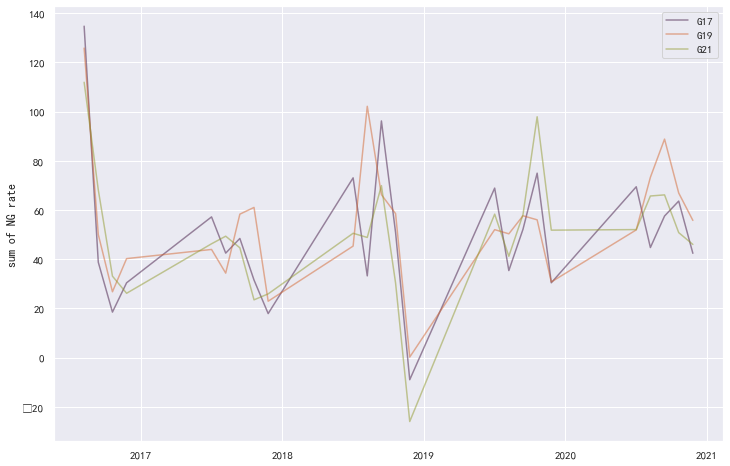

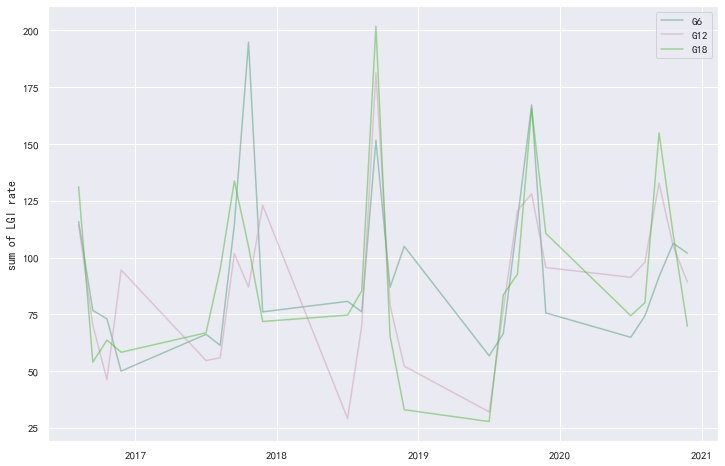

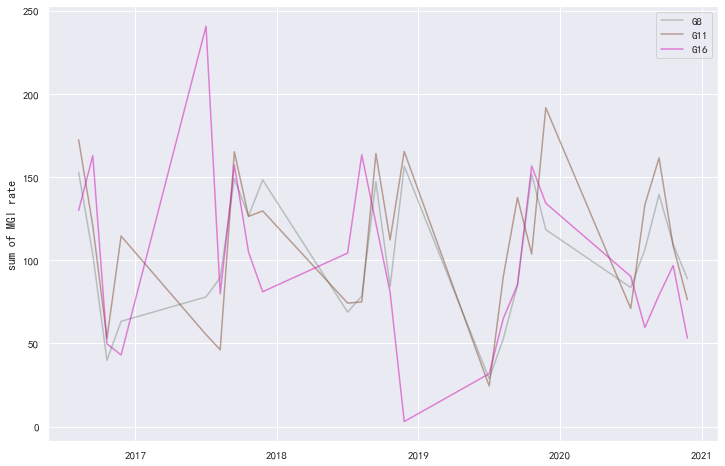

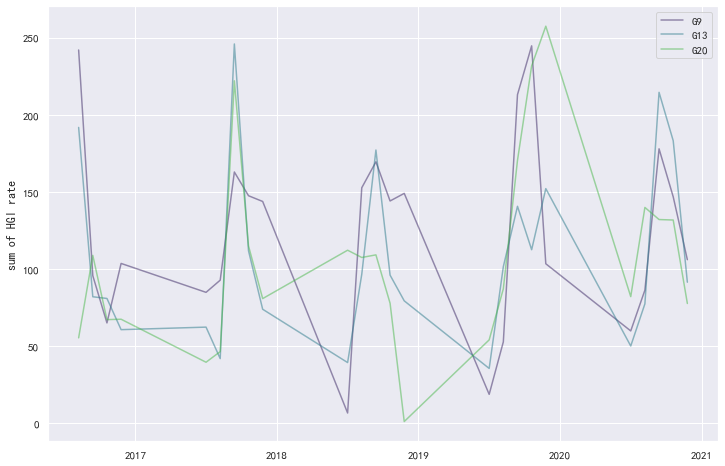

In [119]:

for key,area_line in area.items():
    plt.figure(figsize=(12, 8))
    for area_item in area_line:
        ds = data5.loc[data5['放牧小区Block'].isin([area_item])]
        plt.plot(ds['ym'], ds['rate'], color=randomcolor(), alpha=0.5, label=area_item)
    plt.legend()
    plt.ylabel("sum of {key} rate".format(key = key))
    plt.show()